## SVM METHOD and Neural Network  FOR DDOS 

# Importing libraries

In [3]:
# Packages to import 

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.svm import SVC
#import scipy.io as si

# Exploratory Data Analysis

In [4]:
# import KDD dataset

dataset = pd.read_csv('/home/khadim/MY Datas/KDD_Data/KDDTrain+.csv', header=None)
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
dataset.shape

(125973, 43)

In [6]:
dataset[41]

0              normal
1              normal
2             neptune
3              normal
4              normal
5             neptune
6             neptune
7             neptune
8             neptune
9             neptune
10            neptune
11            neptune
12             normal
13        warezclient
14            neptune
15            neptune
16             normal
17            ipsweep
18             normal
19             normal
20            neptune
21            neptune
22             normal
23             normal
24            neptune
25             normal
26            neptune
27             normal
28             normal
29             normal
             ...     
125943         normal
125944         normal
125945         normal
125946        neptune
125947        ipsweep
125948        neptune
125949         normal
125950       teardrop
125951         normal
125952         normal
125953        neptune
125954         normal
125955         normal
125956         normal
125957    

In [7]:
# The field names 
field = pd.read_csv('/home/khadim/MY Datas/KDD_Data/Field Names.csv', header=None)
field.loc[41] = ['y','symbolic']
field.head(42)
#field.shape

,0,1
0,duration,continuous
1,protocol_type,symbolic
2,service,symbolic
3,flag,symbolic
4,src_bytes,continuous
5,dst_bytes,continuous
6,land,continuous
7,wrong_fragment,continuous
8,urgent,continuous
9,hot,continuous


In [8]:
col = np.transpose(field)
col2 = col[:1]

In [9]:
frames = [col2, dataset]
result = pd.concat(frames)
result2 = result.drop([result.columns[42]] ,  axis='columns')
# change the first row by the column

headers = result2.iloc[0]
result3   = pd.DataFrame(result2.values[1:], columns=headers)
result3.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0,0,0,0.05,0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0,0.6,0.88,0,0,0,0,0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0,0,1,1,0,0,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1,0,0.03,0.04,0.03,0.01,0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1,0,0,0,0,0,0,0,normal


## Features selections
duration	 protocol_type	 src_bytes	 dst_bytes	 land	 wrong_fragment	 count	diff_srv_rate	dst_host_count	dst_host_same_srv_rate	dst_host_diff_srv_rate	dst_host_serror_rate Label	

In [10]:
# dataset with features selected for DDOS attack only 
feadata = result3.iloc[:, [0,1,4,5,6,7,22,29,31,33,34,37,41]]
feadata.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,count,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,y
0,0,tcp,491,0,0,0,2,0,150,0.17,0.03,0,normal
1,0,udp,146,0,0,0,13,0.15,255,0,0.6,0,normal
2,0,tcp,0,0,0,0,123,0.07,255,0.1,0.05,1,neptune
3,0,tcp,232,8153,0,0,5,0,30,1,0,0.03,normal
4,0,tcp,199,420,0,0,30,0,255,1,0,0,normal


In [11]:
#value count in the label
feadata['y'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: y, dtype: int64

# the kind of ddos attack 
we will select in our database KDD the type correspond to the DDOS attack 
Name : Back , land , neptune ,pod , smurf , teardrop

In [12]:
att = ['back' ,'land','neptune','pod','smurf','teardrop', 'normal']
subdata = feadata[feadata['y'].isin(att)] 
subdata.shape

#feadata[feadata['y']=='normal'].shape

(113270, 13)

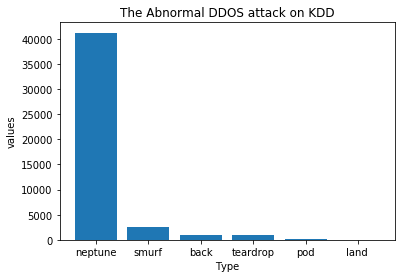

In [13]:
#plot the different vo dataviz
import matplotlib.pyplot as plt
#plt.plot(subdata[13])
subdata['y'].value_counts()
att_plot = [41214,2646,956,892,201,18]
att_col = ['neptune','smurf','back','teardrop','pod','land ']

y_att = np.arange(len(att_col))

# Create bars and choose color
plt.bar(y_att,att_plot)

# Add title and axis names
plt.title('The Abnormal DDOS attack on KDD')
plt.xlabel('Type')
plt.ylabel('values')

# Create names
plt.xticks(y_att, att_col)


plt.show()

In [14]:
# cross table
pd.crosstab(subdata.protocol_type, subdata.y)

y,back,land,neptune,normal,pod,smurf,teardrop
protocol_type,,,,,,,
icmp,0,0,0,1309,201,2646,0
tcp,956,18,41214,53600,0,0,0
udp,0,0,0,12434,0,0,892


In [15]:
#count value of protocol type
subdata['protocol_type'].value_counts()

tcp     95788
udp     13326
icmp     4156
Name: protocol_type, dtype: int64

# Data Preprocessing

In [16]:
# Change the value of the  protocol_type
subdata.protocol_type[subdata.protocol_type == 'tcp'] = 1
subdata.protocol_type[subdata.protocol_type == 'udp'] = 2
subdata.protocol_type[subdata.protocol_type == 'icmp'] = 3
subdata['protocol_type'].value_counts()

/usr/lib/python3/dist-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1    95788
2    13326
3     4156
Name: protocol_type, dtype: int64

In [17]:
# y into class {0,1}
att2 = ['back' ,'land','neptune','pod','smurf','teardrop']
subdata.y[subdata.y== 'normal'] = 0
subdata.y[subdata.y.isin(att2)] = 1

/usr/lib/python3/dist-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
subdata['y'].value_counts()

0    67343
1    45927
Name: y, dtype: int64

In [19]:
subdata.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,count,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,y
0,0,1,491,0,0,0,2,0,150,0.17,0.03,0,0
1,0,2,146,0,0,0,13,0.15,255,0,0.6,0,0
2,0,1,0,0,0,0,123,0.07,255,0.1,0.05,1,1
3,0,1,232,8153,0,0,5,0,30,1,0,0.03,0
4,0,1,199,420,0,0,30,0,255,1,0,0,0


In [20]:
"""# pairwise scatter with seaborne
sns.pairplot(pd.DataFrame(subdata.iloc[:, [0,2,3,4,5,6,7,8,9,10,11]]))
plt.show() """

'# pairwise scatter with seaborne\nsns.pairplot(pd.DataFrame(subdata.iloc[:, [0,2,3,4,5,6,7,8,9,10,11]]))\nplt.show() '

Remove Rows With Missing Values

In [26]:
subdata = subdata.dropna()

In [28]:
#export data for neural_network
#E:\AIMS\Modelisation_S_N\KDD_Data

subdata.to_csv(r'/home/khadim/MY Datas/KDD_Data/neural_data.csv',index = None, header=True)

#test = subdata.to_csv(index=False)

# Standardized Values

In [23]:
from sklearn import preprocessing

#create database x_array
x_array = subdata.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
y_array = subdata.iloc[:, [12]]

"""# standardize the data attributes
stand_X = preprocessing.scale(x_array)
stand_X = pd.DataFrame(stand_X)
stand_X.shape
stand_X.head() """

'# standardize the data attributes\nstand_X = preprocessing.scale(x_array)\nstand_X = pd.DataFrame(stand_X)\nstand_X.shape\nstand_X.head() '

# Min-Max

In [25]:
scaler = preprocessing.MinMaxScaler()
stand_X = scaler.fit_transform(x_array)
stand_X = pd.DataFrame(stand_X)

stand_X.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.000005,0.00000,0.0,0.0,0.003914,0.00,0.588235,0.17,0.03,0.00
1,0.0,0.5,0.000002,0.00000,0.0,0.0,0.025440,0.15,1.000000,0.00,0.60,0.00
2,0.0,0.0,0.000000,0.00000,0.0,0.0,0.240705,0.07,1.000000,0.10,0.05,1.00
3,0.0,0.0,0.000003,0.00116,0.0,0.0,0.009785,0.00,0.117647,1.00,0.00,0.03
4,0.0,0.0,0.000002,0.00006,0.0,0.0,0.058708,0.00,1.000000,1.00,0.00,0.00


#  Robust Scaler

In [26]:
""" scaler = preprocessing.RobustScaler()
stand_X = scaler.fit_transform(x_array)
stand_X = pd.DataFrame(stand_X)
stand_X.head() """

' scaler = preprocessing.RobustScaler()\nstand_X = scaler.fit_transform(x_array)\nstand_X = pd.DataFrame(stand_X)\nstand_X.head() '

# Principal component analysis (PCA)

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stand_X, y_array, test_size=0.3, random_state=0) 


In [28]:
from sklearn.decomposition import PCA
np.random.seed(0)

model = PCA(n_components=5)
X_train_pca = model.fit_transform(X_train)
print (model.explained_variance_)
print (model.explained_variance_ratio_)
print (np.round(model.explained_variance_ratio_.cumsum(), decimals=3)*100)



[0.41351784 0.11113811 0.06393438 0.0473207  0.0231786 ]
[0.6027238  0.16198959 0.09318769 0.06897238 0.03378401]
[60.3 76.5 85.8 92.7 96.1]


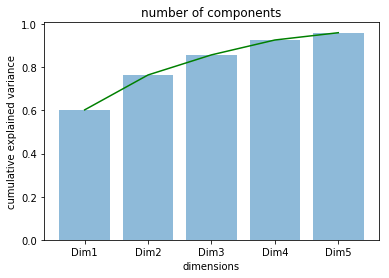

In [29]:
# Choosing the number of components
import matplotlib.pyplot as plt

dim = ('Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5')
y_dim = np.arange(len(dim))

fig, ax = plt.subplots()
ax.plot(model.explained_variance_ratio_.cumsum(), 'green')
plt.bar(y_dim,model.explained_variance_ratio_.cumsum(),align='center', alpha=0.5)
plt.xticks(y_dim, dim)
plt.xlabel('dimensions')
plt.ylabel('cumulative explained variance')
plt.title('number of components')
plt.show();

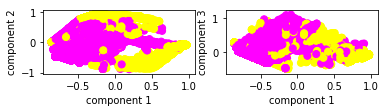

In [30]:
# plotting scatters

import matplotlib.pyplot as plt
plt.subplot(321)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=50, cmap='spring'); 
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.subplot(322)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, s=50, cmap='spring'); 
plt.xlabel('component 1')
plt.ylabel('component 3')
""" plt.subplot(323)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 3], c=y_train, s=50, cmap='spring'); 


plt.subplot(324)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 4], c=y_train, s=50, cmap='spring'); """
plt.show()

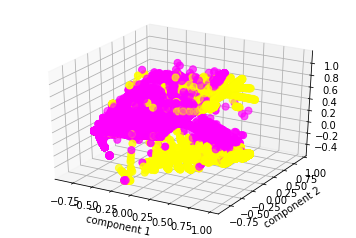

In [31]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Data for three-dimensional scattered points
ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, s=50, cmap='spring')
plt.xlabel('component 1')
plt.ylabel('component 2')


plt.show()

In [32]:
X_test_pca = model.transform(X_test) 

# Training the Algorithm

### SUPPORT VECTOR MACHINES AND METHODS :

* linearly Separable Data

In [33]:
#Import svm model
from sklearn import svm

y_train=y_train.astype('int')
y_test = y_test.astype('int') 
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_pca,y_train)

#Predict the response for test dataset
y1_pred = clf.predict(X_test_pca)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[19731   397]
 [  993 12860]]


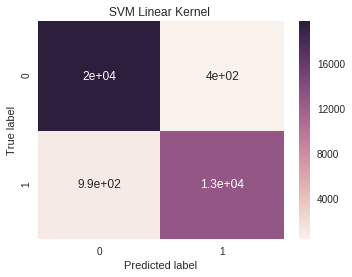

In [34]:
# Creates a confusion matrix

from sklearn.metrics import classification_report ,confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y1_pred) 
print(cm)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
# Evaluating the Model

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y1_pred))

Accuracy: 0.9590947882640299


We  get a classification rate of 97.08%, considered as very good accuracy.

For further evaluation, we  can also check precision and recall of model.

In [36]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y1_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y1_pred))

Precision: 0.9700535566116014
Recall: 0.9283187757164513


We get a precision of 97% and recall of 95%, which are considered as very good values.

In [34]:
print(classification_report(y_test,y1_pred)) 

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     20128
          1       0.97      0.93      0.95     13853

avg / total       0.96      0.96      0.96     33981



#### Non-linearly Separable Data (Kernel SVM)

We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

* 1. Polynomial Kernel

In [39]:
# Create Model 

svcp = SVC(kernel='poly', degree=4)  
svcp.fit(X_train_pca,y_train) 

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
# Making Prediction 
y2_pred = svcp.predict(X_test_pca) 
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

Accuracy: 0.8997086607221683


In [37]:
# Evaluating the Algorithm

print(confusion_matrix(y_test, y2_pred))  
print(classification_report(y_test, y2_pred)) 

[[20039    89]
 [ 3319 10534]]
             precision    recall  f1-score   support

          0       0.86      1.00      0.92     20128
          1       0.99      0.76      0.86     13853

avg / total       0.91      0.90      0.90     33981



*  2.  2.Gaussian Kernel

In [41]:
# Model G
svcg = SVC(kernel='rbf')  
svcg.fit(X_train_pca,y_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
# Prediction

y3_pred = svcg.predict(X_test_pca)  

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y3_pred))

Accuracy: 0.9757805832671199


In [45]:
# Evaluation

print(confusion_matrix(y_test, y3_pred))  
print(classification_report(y_test, y3_pred)) 

[[19953   175]
 [  648 13205]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     20128
          1       0.99      0.95      0.97     13853

avg / total       0.98      0.98      0.98     33981



 * 3. 3.Sigmoid Kernel

In [41]:
# Model 
svcS = SVC(kernel='sigmoid')  
svcS.fit(X_train_pca, y_train)

C:\Users\D T S\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# Prediction
y4_pred = svcS.predict(X_test_pca)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y4_pred))

Accuracy: 0.9451752449898473


In [43]:
# Evaluation

print(confusion_matrix(y_test, y4_pred))  
print(classification_report(y_test, y4_pred)) 

[[19458   670]
 [ 1193 12660]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95     20128
          1       0.95      0.91      0.93     13853

avg / total       0.95      0.95      0.94     33981



In [50]:
""" from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y4_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()"""

" from sklearn.metrics import roc_curve, roc_auc_score\n\nfpr, tpr, _ = roc_curve(y_test, y4_pred)\n\nplt.clf()\nplt.plot(fpr, tpr)\nplt.xlabel('FPR')\nplt.ylabel('TPR')\nplt.title('ROC curve')\nplt.show()"

* Comparison the model

In [45]:
comp = np.transpose([metrics.accuracy_score(y_test, y1_pred), metrics.accuracy_score(y_test, y2_pred) ,metrics.accuracy_score(y_test, y3_pred), metrics.accuracy_score(y_test, y4_pred)])
colu = np.transpose(['linear','Polynomial','Gaussian','sigmoid'])
cont = pd.DataFrame([comp],columns=colu) 
cont.head()
#acc = pd.DataFrame(comp)
#acc.head()

,linear,Polynomial,Gaussian,sigmoid
0,0.959124,0.899709,0.975781,0.945175


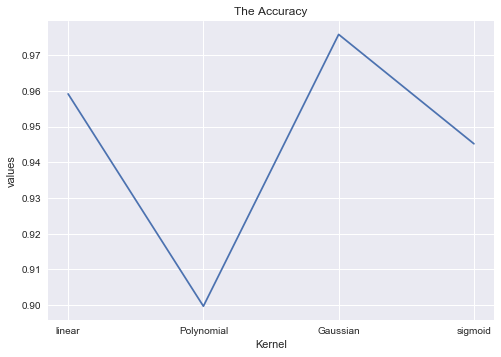

In [46]:
y_pos = np.arange(len(colu))

# Create bars and choose color
plt.plot(y_pos,comp )

# Add title and axis names
plt.title('The Accuracy')
plt.xlabel('Kernel')
plt.ylabel('values')

# Create names
plt.xticks(y_pos, colu)


plt.show()